In [485]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA as sklearn_pca
import locale
from locale import atof
import warnings
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import f_regression
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pickle
from sklearn.cross_decomposition import PLSRegression

**Load new dataset**

In [486]:
#Load data form excel spreadsheet into pandas
xls_file = pd.ExcelFile('D:\\Users\\Borja.gonzalez\\Desktop\\Thinkful-DataScience-Borja\\Test_fbidata2014.xlsx')

# View the excel file's sheet names
#xls_file.sheet_names

# Load the xls file's 14tbl08ny as a dataframe
testfbi2014 = xls_file.parse('14tbl08ny')

**Clean and prepare the new dataset**

In [487]:
#Transform FBI Raw Data
#Rename columns with row 3 from the original data set
testfbi2014 = testfbi2014.rename(columns=testfbi2014.iloc[3])

#Delete first three rows don´t contain data for the regression model
testfbi2014 = testfbi2014.drop(testfbi2014.index[0:4])

#Delete columns containing "Rape"
testfbi2014 = testfbi2014.drop(['City','Arson3','Rape\n(revised\ndefinition)1','Rape\n(legacy\ndefinition)2'], axis = 1)

#Change names in Columns
testfbi2014 = testfbi2014.rename(columns={'Violent\ncrime': 'Violent Crime', 'Murder and\nnonnegligent\nmanslaughter': 'Murder', 'Robbery': 'Robbery', 'Aggravated\nassault': 'Assault', 'Property\ncrime': 'PropertyCrime', 'Burglary': 'Burglary', 'Larceny-\ntheft': 'Larceny & Theft', 'Motor\nvehicle\ntheft': 'MotorVehicleTheft'})

#Clean NaN values from dataset and reset index
testfbi2014 = testfbi2014.dropna().reset_index(drop=True)

#Convert objects to floats
testfbi2014.astype('float64').info()

#Scale and preprocess the dataset
names = testfbi2014.columns
fbi2014_scaled = pd.DataFrame(preprocessing.scale(testfbi2014), columns = names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
Population           368 non-null float64
Violent Crime        368 non-null float64
Murder               368 non-null float64
Robbery              368 non-null float64
Assault              368 non-null float64
PropertyCrime        368 non-null float64
Burglary             368 non-null float64
Larceny & Theft      368 non-null float64
MotorVehicleTheft    368 non-null float64
dtypes: float64(9)
memory usage: 25.9 KB


**Import the model from Challenge: make your own regression model**

In [488]:
# load the model from disk
filename = 'finalized_regr.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Inspect the results.
print('\nCoefficients: \n', loaded_model.coef_)
print('\nIntercept: \n', loaded_model.intercept_)
print('\nR-squared:')
print(loaded_model.score(X, Y))
print('\nVariables in the model: \n',list(X.columns))


Coefficients: 
 [ 0.28185986  0.1676387   0.6022175 ]

Intercept: 
 2.26845917801e-17

R-squared:
0.994755015696

Variables in the model: 
 ['Population', 'Robbery', 'Burglary']


**Cross Validation & Predictive Power of the "Challenge: make your own regression model" model**

In [489]:
X1 = fbi2014_scaled.drop(['Violent Crime','Murder','Larceny & Theft','PropertyCrime','MotorVehicleTheft','Assault'],axis=1)
Y1 = fbi2014_scaled['PropertyCrime'].values.ravel()

In [490]:
#Initiating the cross validation generator, N splits = 10

kf = KFold(20)

In [491]:
#Cross validate the model on the folds
loaded_model.fit(X1,Y1)
scores = cross_val_score(loaded_model, X1, Y1, cv=kf)
print('Cross-validated scores:', scores)
print('Cross-validation average:', scores.mean())

Cross-validated scores: [ 0.9720185   0.93804928  0.99871224  0.88493645  0.84714914  0.91537436
  0.92580617  0.86375897  0.90231454  0.75647478  0.48434937  0.65082505
  0.93941435  0.67214386  0.79902404  0.98930422  0.9685836   0.98701888
  0.95173945  0.55173442]
Cross-validation average: 0.849936584332


In [492]:
#Predictive accuracy

predictions = cross_val_predict(loaded_model, X1, Y1, cv=kf)
accuracy = metrics.r2_score(Y1, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.94319469344


In [493]:
# Instantiate and fit our model.
regr1 = linear_model.LinearRegression()
regr1.fit(X1, Y1)

# Inspect the results.
print('\nCoefficients: \n', regr1.coef_)
print('\nIntercept: \n', regr1.intercept_)
print('\nVariables in the model: \n',list(X1.columns))


Coefficients: 
 [ 0.74297568 -0.16067887  0.423637  ]

Intercept: 
 -1.73205924763e-17

Variables in the model: 
 ['Population', 'Robbery', 'Burglary']


In [494]:
#Cross validate the new model on the folds

scores = cross_val_score(regr1, X1, Y1, cv=kf)
print('Cross-validated scores:', scores)
print('Cross-validation average:', scores.mean())

Cross-validated scores: [ 0.9720185   0.93804928  0.99871224  0.88493645  0.84714914  0.91537436
  0.92580617  0.86375897  0.90231454  0.75647478  0.48434937  0.65082505
  0.93941435  0.67214386  0.79902404  0.98930422  0.9685836   0.98701888
  0.95173945  0.55173442]
Cross-validation average: 0.849936584332


In [495]:
#Cross validation, scores
predictions = cross_val_predict(regr1, X1, Y1, cv=kf)
accuracy = metrics.r2_score(Y1, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.94319469344


R-squared PLSR: 0.99926129466
R-squared LR: 0.849936584332


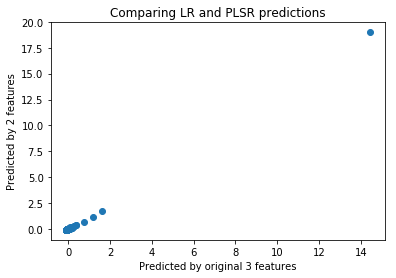

In [496]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 2 dimensions.
pls1 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls1.fit(X1, Y1)

# Save predicted values.
PLS_predictions = pls1.predict(X1)
print('R-squared PLSR:', pls1.score(X1, Y1))
print('R-squared LR:', scores.mean())

# Compare the predictions of the two models
plt.scatter(predictions,PLS_predictions) 
plt.xlabel('Predicted by original 3 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

**Conclusions & additional notes**

 - The model has been tested through follwing cross-validation until 79% has been achieved using FBI data for 2013
 - Results from cross vaidation training & features selection can be seen in Challenge: make your own regression model 
 - New fbidata 2014 has been scaled and passed through the best model achieved in Challenge: make your own regression model
 - The predictive capacity of the model is 94% and the cross validation score is 85%. This is the higher R2 that can I have been able to achieve through cross validation while training the model.